In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.options.display.max_columns = 1000
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)
from sklearn.model_selection import train_test_split


In [3]:
# Load each data file into a data frame
item_categories = pd.read_csv(r"C:\Users\HP\Documents\DATASCIENCE\competitive-data-science-predict-future-sales/item_categories.csv", sep=",")
items = pd.read_csv(r"C:\Users\HP\Documents\DATASCIENCE\competitive-data-science-predict-future-sales/items.csv", sep=",")
shops = pd.read_csv(r"C:\Users\HP\Documents\DATASCIENCE\competitive-data-science-predict-future-sales/shops.csv", sep=",")
test = pd.read_csv(r"C:\Users\HP\Documents\DATASCIENCE\competitive-data-science-predict-future-sales/test.csv", sep=",")
sales_train = pd.read_csv(r"C:\Users\HP\Documents\DATASCIENCE\competitive-data-science-predict-future-sales/sales_train.csv", sep=",")

In [5]:
items

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


In [6]:
sales_train['date'] = pd.to_datetime(sales_train['date'])

In [7]:
sales_train[:20]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-02-01,0,59,22154,999.00,1.0
1,2013-03-01,0,25,2552,899.00,1.0
2,2013-05-01,0,25,2552,899.00,-1.0
3,2013-06-01,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0
5,2013-10-01,0,25,2564,349.00,1.0
6,2013-02-01,0,25,2565,549.00,1.0
7,2013-04-01,0,25,2572,239.00,1.0
8,2013-11-01,0,25,2572,299.00,1.0
9,2013-03-01,0,25,2573,299.00,3.0


In [8]:
items_map = pd.Series(data=items['item_category_id'], index=items['item_id'])
sales_train['item_id_category'] = sales_train['item_id'].map(items_map)
test['item_id_category'] = test['item_id'].map(items_map)

In [9]:
itemid = list(sales_train.item_id)
price = list(sales_train.item_price)
shopid = list(sales_train.shop_id)

itemidt = list(test.item_id)
shopidt = list(test.shop_id)

ve = []
for i in range(len(sales_train)):
    ve.append(str(shopid[i])+str(itemid[i]))

sales_train['ve'] = ve
voo = list(sales_train['ve'].unique())
    
vet = []
for i in range(len(test)):
    vet.append(str(shopidt[i])+str(itemidt[i]))
test['ve'] = vet
    

In [10]:
sales_train = sales_train.drop(['item_price','date','date_block_num'],axis = 1)

In [11]:
test

,ID,shop_id,item_id,item_id_category,ve
0,0,5,5037,19,55037
1,1,5,5320,55,55320
2,2,5,5233,19,55233
3,3,5,5232,23,55232
4,4,5,5268,20,55268
...,...,...,...,...,...
214195,214195,45,18454,55,4518454
214196,214196,45,16188,64,4516188
214197,214197,45,15757,55,4515757
214198,214198,45,19648,40,4519648


In [12]:
submissionid = test['ID']
test = test.drop(['ID'],axis = 1)
sales_train = sales_train[:60000]
X = sales_train.drop(['item_cnt_day'],axis = 1)
y = sales_train.item_cnt_day

In [13]:
y

0        1.0
1        1.0
2       -1.0
3        1.0
4        1.0
        ... 
59995    1.0
59996    1.0
59997    1.0
59998    1.0
59999    1.0
Name: item_cnt_day, Length: 60000, dtype: float64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
def trainandsplit(x,y,xtest,ytest):
        from sklearn.metrics import mean_squared_error
        from sklearn.linear_model import SGDClassifier
        from sklearn import linear_model
        reg = linear_model.LinearRegression()
        clf = SGDClassifier(max_iter=1000, tol=1e-3)
        clf.fit(x,y)
        reg.fit(x,y)
        predicted_score = clf.predict(xtest)
        predicted_scorer = reg.predict(xtest)
        error = mean_squared_error(ytest,predicted_score)
        error2 = mean_squared_error(ytest,predicted_scorer)
        return predicted_score,predicted_scorer,clf,reg,error,error2

In [28]:
a,b, model1,model2,error,error2 = trainandsplit(X_train,y_train,X_test,y_test)

In [35]:
pred = pd.DataFrame()
pred['regression'] = b
pred['sdg'] = a


16482.391186696856

In [41]:
y_test.unique()

array([ 1.,  2.,  5.,  3., -1.,  4., 12.,  6.,  7., 10., -3.,  9.,  8.,
       13., 15., 11., -5., -2., 14.])

In [30]:
error2

0.35330588358307313

In [31]:
pdd = model2.predict(test)

In [32]:
sub = pd.DataFrame()
sub['ID'] = submissionid
sub['item_cnt_month'] = pdd

In [33]:
sub.to_csv('firstoooinnn.csv', index=False)
print('File Successfully Saved.!!!')

File Successfully Saved.!!!


<AxesSubplot:title={'center':'Count of sold item per day'}, xlabel='date'>

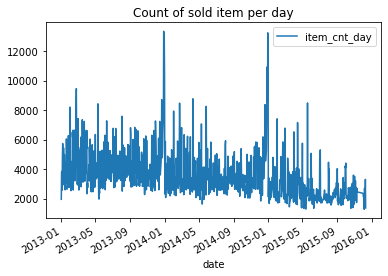

In [118]:
sales_train.groupby(['date'])[['item_cnt_day']].sum().plot(title="Count of sold item per day")